# Facility dispersion

## maxisum

$$
\begin{align}
    \text{max} \quad & \sum_{i \in V}\sum_{j \in V} d_{i, j} z_{i, j} \\
    \text{s.t} \quad & \sum_{i \in V} x_{i} = p & \forall \; i \in V \\
    & z_{i, j} \leq x_{i} & \forall \; i, j \in A \\
    & z_{i, j} \leq x_{j} & \forall \; i, j \in A \\
    & z_{i, j} \geq x_{i} + x_{j} - 1 & \forall \; i, j \in A \\
    & x_{i} \in \{0, 1\} & \forall \; i \in V \\
    & z_{i, j} \in \{0, 1\} & \forall \; i, j \in A \\
\end{align}
$$

## p-dispersion

$$
\begin{align}
    \text{max} \quad & D \\
    \text{s.t} \quad & \sum_{i \in V} x_{i} = p & \forall \; i \in V \\
    & D \leq d_{i, j} + M (1 - x_{i}) + M (1 - x_{j}) & \forall \; i, j \in A \\
    & x_{i} \in \{0, 1\} & \forall \; i \in V
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyomo.contrib.appsi.solvers.highs import Highs

In [2]:
from models import PDispersion, MaxiSum, Hybrid

In [3]:
np.random.seed(12)

N = 25
p = 5

coordinates = np.random.random((N, 2))

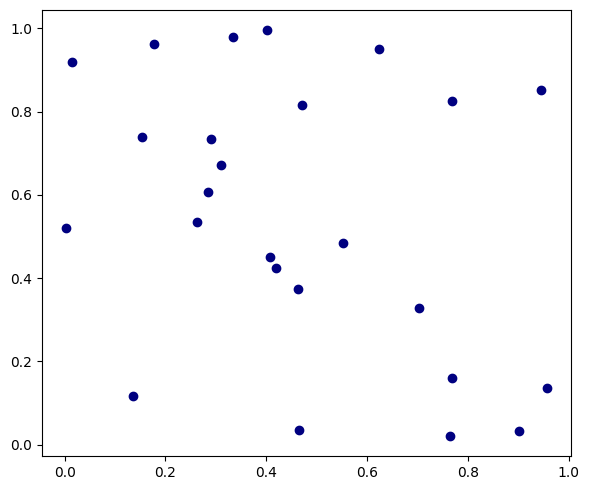

In [4]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(
    coordinates[:, 0],
    coordinates[:, 1],
    color="navy"
)
fig.tight_layout()
plt.show()

In [5]:
solver = Highs()
solver.highs_options = {"log_file": "Highs.log", "mip_heuristic_effort": 0.2}

In [6]:
p_dispersion = PDispersion(coordinates, p)
maxisum = MaxiSum(coordinates, p)
hybrid = Hybrid(coordinates, p)

In [7]:
res = solver.solve(p_dispersion)
print(res)

termination_condition: TerminationCondition.optimal
best_feasible_objective: 0.5373667566425331
best_objective_bound: 0.5373667566425331


In [8]:
res = solver.solve(maxisum)
print(res)

In [ ]:
res = hybrid.solve(solver)
print(res)

termination_condition: TerminationCondition.optimal
best_feasible_objective: 16.0718617320494
best_objective_bound: 16.0718617320494


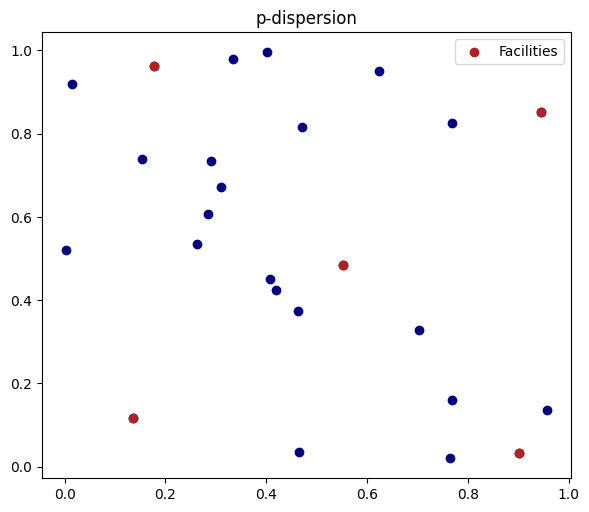

In [ ]:
fig = p_dispersion.plot()
ax = plt.gca()
ax.set_title("p-dispersion")
plt.show()

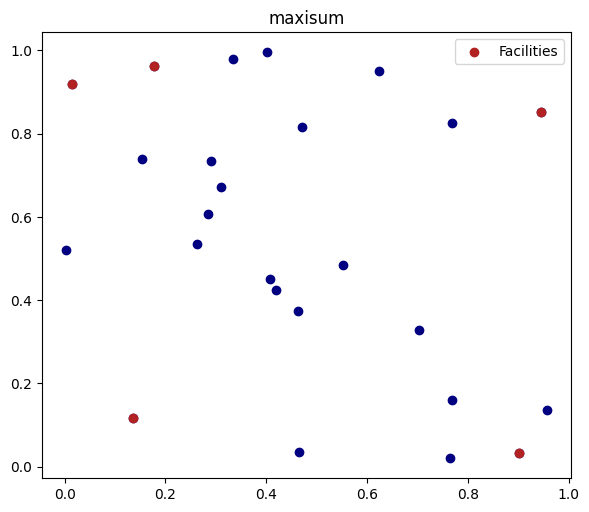

In [ ]:
fig = maxisum.plot()
ax = plt.gca()
ax.set_title("maxisum")
plt.show()

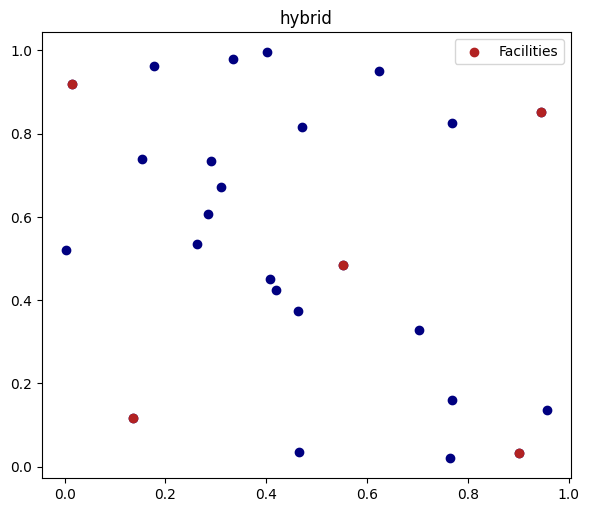

In [ ]:
fig = hybrid.plot()
ax = plt.gca()
ax.set_title("hybrid")
plt.show()